In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import copy
import math

In [9]:
import numpy as np

# Replace 'house_data.csv' with the path to your CSV file.
data = np.genfromtxt('HousingData.csv', delimiter=',', skip_header=1)

X = data[:, :-1]  # Features (all columns except the last one)
y = data[:, -1]   # Target variable (last column)
y = y / 1000000

print("Features (X):\n", X)
#Price of house in million baht
print("Target variable (Y):\n", y)
print("-----------------------------------------")
print(X.shape)
print(y.shape)

Features (X):
 [[120.   2.   1.  15.]
 [150.   3.   2.  10.]
 [180.   4.   2.   5.]
 [100.   2.   1.  20.]
 [200.   4.   3.   7.]
 [160.   3.   2.  12.]
 [220.   5.   2.   8.]
 [130.   3.   1.  18.]
 [190.   4.   2.   6.]
 [110.   2.   1.  17.]]
Target variable (Y):
 [2.5 3.2 4.  1.8 5.5 3.6 4.8 2.3 4.2 2. ]
-----------------------------------------
(10, 4)
(10,)


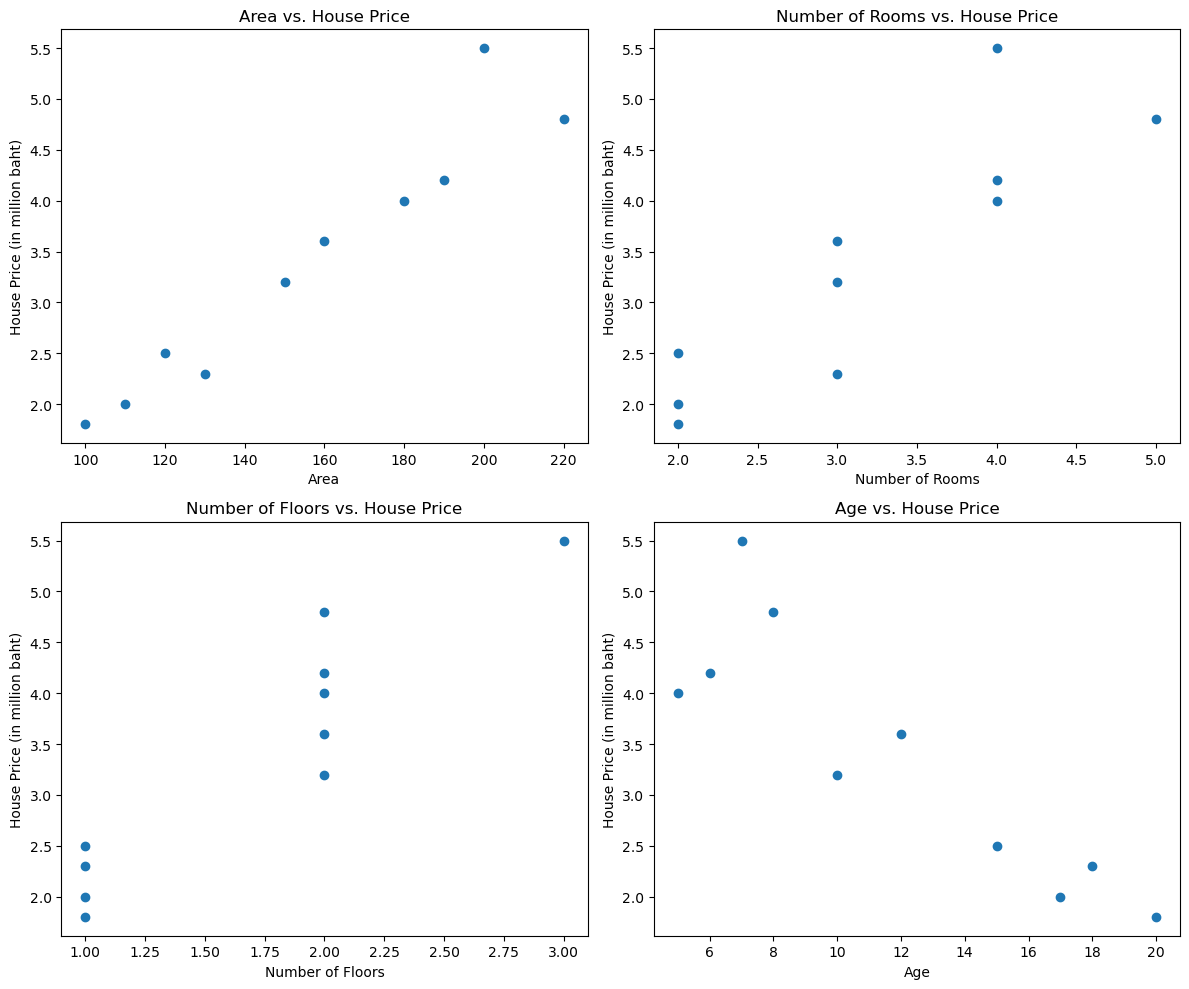

In [15]:
# Create subplots for each feature
features = ["Area", "Number of Rooms", "Number of Floors", "Age"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    feature_values = X[:, i]
    ax.scatter(feature_values, y)
    ax.set_xlabel(features[i])
    ax.set_ylabel("House Price (in million baht)")
    ax.set_title(f"{features[i]} vs. House Price")

plt.tight_layout()
plt.show()

In [16]:
def prediction(X, w, b):
    predict = np.dot(X,w) + b
    return predict

In [1]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        loss = ((np.dot(X[i],w) + b) - y[i]) ** 2
        cost += loss
    cost = cost / (2*m)
    return cost

In [3]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += (err * X[i,j])
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [12]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if i < 100000:
            J_history.append(compute_cost(X, y, w, b))
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history


In [7]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [21]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                                    iterations, alpha)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X.shape
predict_value = np.zeros(y.shape)
for i in range(m):
    p = prediction(X[i], w_final, b_final)
    predict_value[i] = p
    print(f"prediction: {p:0.2f}, target value: {y[i]}")

Iteration    0: Cost     6.28   
Iteration  100: Cost     0.55   
Iteration  200: Cost     0.13   
Iteration  300: Cost     0.10   
Iteration  400: Cost     0.10   
Iteration  500: Cost     0.10   
Iteration  600: Cost     0.10   
Iteration  700: Cost     0.10   
Iteration  800: Cost     0.10   
Iteration  900: Cost     0.10   
b,w found by gradient descent: 0.00,[0.02213411 0.00045261 0.00030992 0.00027787] 
prediction: 2.66, target value: 2.5
prediction: 3.32, target value: 3.2
prediction: 3.99, target value: 4.0
prediction: 2.22, target value: 1.8
prediction: 4.43, target value: 5.5
prediction: 3.55, target value: 3.6
prediction: 4.87, target value: 4.8
prediction: 2.88, target value: 2.3
prediction: 4.21, target value: 4.2
prediction: 2.44, target value: 2.0


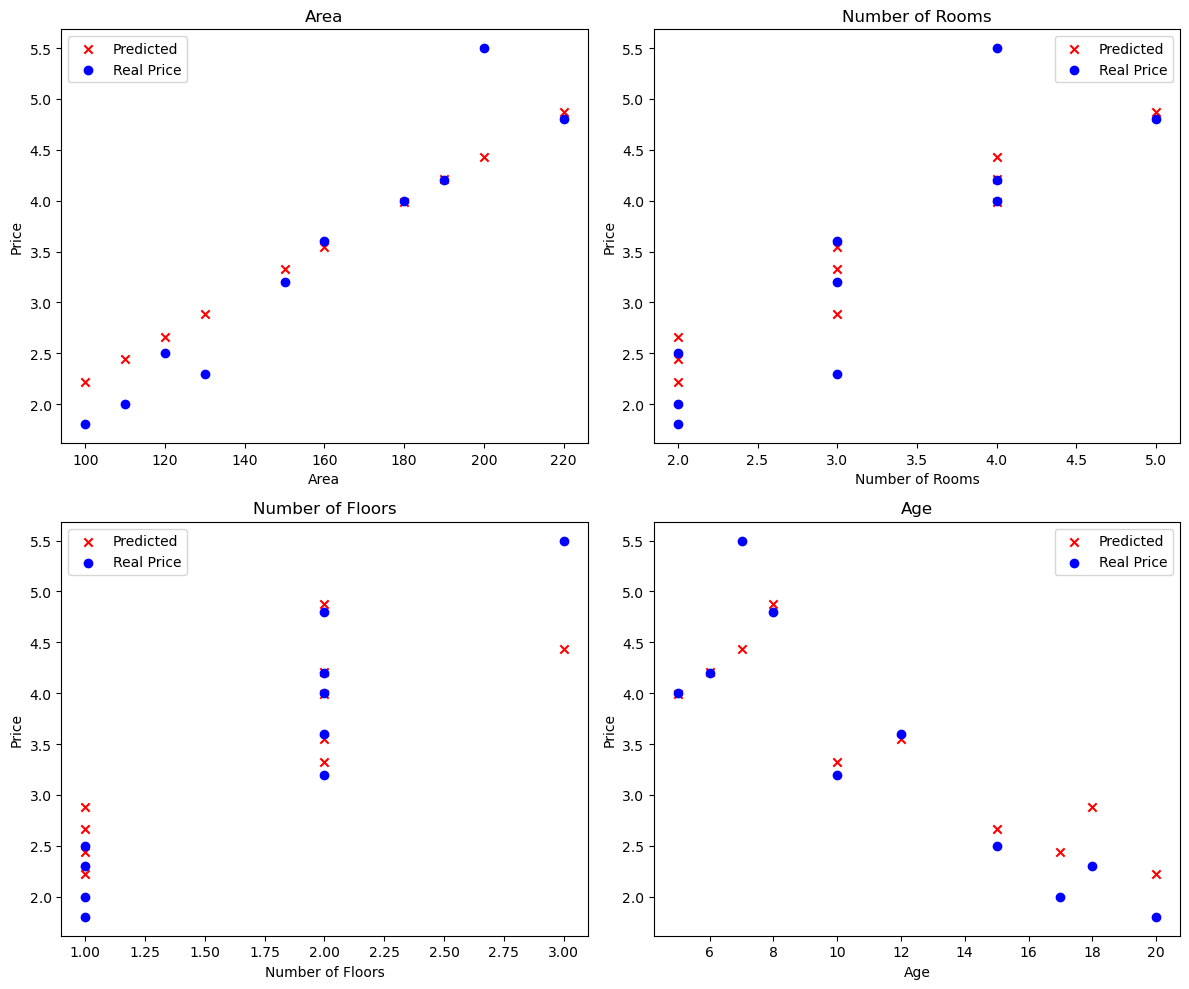

In [23]:
# Create a new figure with subplots for each feature
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define the titles for each subplot
titles = ['Area', 'Number of Rooms', 'Number of Floors', 'Age']

# Loop through each feature
for i in range(4):
    row, col = i // 2, i % 2
    ax = axs[row, col]
    ax.scatter(X[:, i], predict_value, marker='x', label='Predicted', c='r')
    ax.scatter(X[:, i], y, marker='o', label='Real Price', c='b')
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i])
    ax.set_ylabel('Price')
    ax.legend()

# Adjust layout and display the graphs
plt.tight_layout()
plt.show()
